# Реализация базового алгоритма RL и запуск первых экспериментов
## Код (реализация и эксперименты):

In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt

# Создаем среду из Gym (дискретная среда для Q-Learning)
env = gym.make("FrozenLake-v1", is_slippery=False)  # детерминированная версия

# Инициализация Q-таблицы
q_table = np.zeros((env.observation_space.n, env.action_space.n))

# Гиперпараметры
alpha = 0.1        # скорость обучения
gamma = 0.99       # коэффициент дисконтирования
epsilon = 1.0     # вероятность выбора случайного действия (для ε-жадной стратегии)
epsilon_decay = 0.995
min_epsilon = 0.01
episodes = 3000

rewards = []

# Обучение агента
for ep in range(episodes):
    state = env.reset()[0]
    done = False
    total_reward = 0
    sc = 0

    while not done:
        # ε-жадная стратегия
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        next_state, reward, done, _, _ = env.step(action)

        # Обновление Q-таблицы
        q_table[state, action] = q_table[state, action] + alpha * (
            reward + gamma * np.max(q_table[next_state]) - q_table[state, action]
        )

        state = next_state
        total_reward += reward
        print(reward)
    # Обновление epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    rewards.append(total_reward)
    print("total:", total_reward)

# Скользящее среднее для сглаживания
def moving_avg(x, w=50):
    if len(x) < w:
        return x
    return np.convolve(x, np.ones(w)/w, mode='valid')


plt.plot(moving_avg(rewards))
plt.title("Q-Learning: Награда по эпизодам (скользящее среднее)")
plt.xlabel("Эпизоды")
plt.ylabel("Награда")
plt.grid()
plt.show()

## Краткий отчёт и анализ:
### При выбранных гиперпараметрах в 8 из 10 случаев агент успешно обучается, получается следующий график кумулятивного вознаграждения:
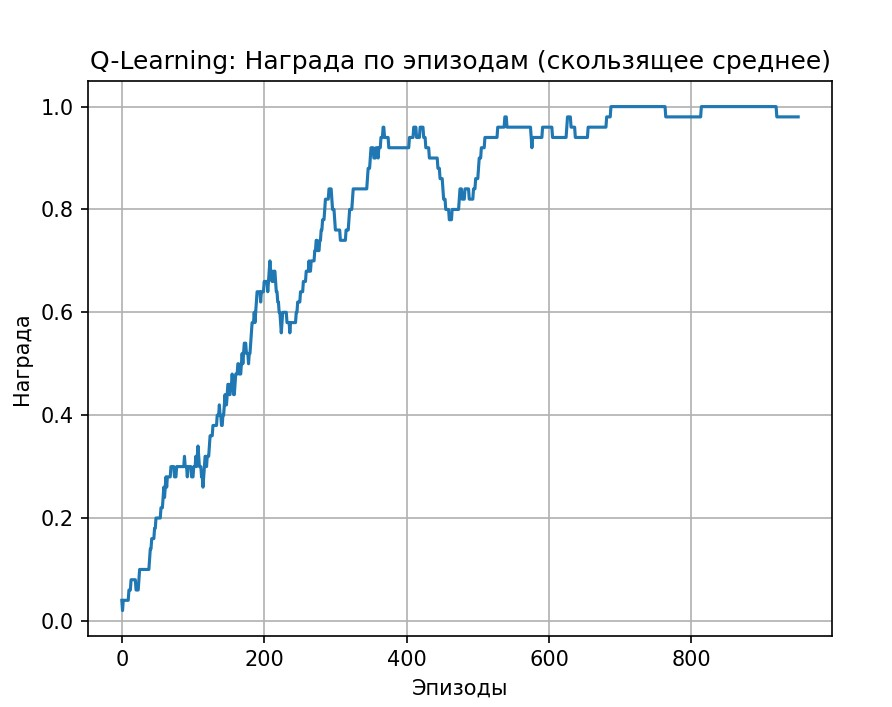
### Однако в оставшихся случаях он не обучается, из-за чего график выходит следующим:
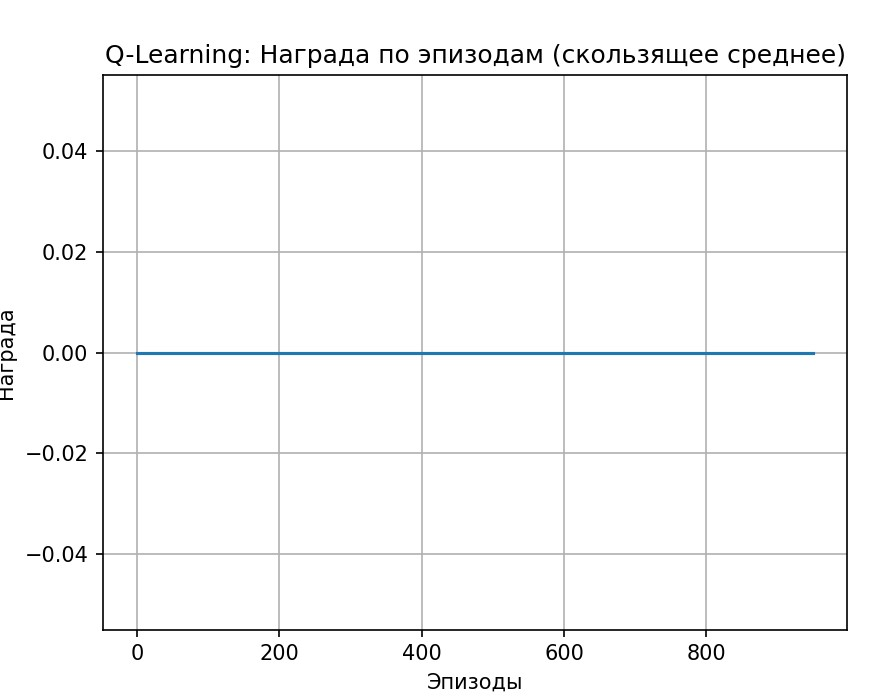